Que.5

In Churn.csv dataset you have to predict that customer is exited or not based on various factors given in dataset.
Implement a KNN,SVM and Naive Bayes model and calculate Accuracy by confusion matrix, Calculate accuracy score, precision score, recall score, f1 score.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("Churn.csv")

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.drop('RowNumber',axis = 1,inplace = True)
df.drop('Surname',axis = 1,inplace = True)
df.drop('CustomerId',axis = 1, inplace = True)

### Converting categorical data into numerical data

In [7]:
from sklearn.preprocessing import LabelEncoder
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
df['Geography'] = LabelEncoder().fit_transform(df['Geography'])

In [8]:
df.corr()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,0.007888,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Geography,0.007888,1.000000,0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943
Gender,-0.002857,0.004719,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
Age,-0.003965,0.022812,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,0.003739,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.069408,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,0.003972,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.008523,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.006724,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.001369,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [9]:
df.drop('EstimatedSalary',axis = 1, inplace = True)


## Splitting the data

In [10]:
x = df.drop('Exited',axis = 1)
y = df['Exited']

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=123456)

In [12]:
def KNN():
    from sklearn.neighbors import KNeighborsClassifier
    model = KNeighborsClassifier()
    model.fit(x_train,y_train)
    return model

In [13]:
def SVM():
    from sklearn.svm import SVC
    model = SVC()
    model.fit(x_train,y_train)
    return model

In [14]:
def NB():
    from sklearn.naive_bayes import GaussianNB
    model = GaussianNB()
    model.fit(x_train,y_train)
    return model

In [15]:
models = []
models.append({'name':'KNN','model':KNN()})
models.append({'name':'SVM','model':SVM()})
models.append({'name':'NB','model':NB()})

In [16]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score, confusion_matrix
def model_evaluations(i):
        y_pred = i['model'].predict(x_test)
        accuracy = accuracy_score(y_test,y_pred)
        precision = precision_score(y_test,y_pred)
        recall = recall_score(y_test,y_pred)
        f1 = f1_score(y_test,y_pred)
        cm = confusion_matrix(y_test,y_pred)
        return f"{accuracy:.2f}" , f"{precision:.2f}" , f"{recall:.2f}" , f"{f1:.2f}"

In [17]:
for i in models:
    accuracy,precision,recall,f1 = model_evaluations(i)
    i['accuracy'] = accuracy
    i['precision'] = precision
    i['recall'] = recall
    i['f1'] = f1
    

In [18]:
evaluation_report = pd.DataFrame(models,columns = ['name','accuracy','precision','recall','f1'])

In [19]:
evaluation_report

,name,accuracy,precision,recall,f1
0,KNN,0.75,0.22,0.09,0.13
1,SVM,0.79,0.00,0.00,0.00
2,NB,0.79,0.43,0.08,0.13


In [34]:
def model_visualiztion(model):
    y_pred = model.predict(x_test)

    plt.scatter(x_test['CreditScore'][y_pred == 0] , x_test['Balance'][y_pred == 0], color = 'green')
    plt.scatter(x_test['CreditScore'][y_pred == 1] , x_test['Balance'][y_pred == 1], color = 'red')
    
    

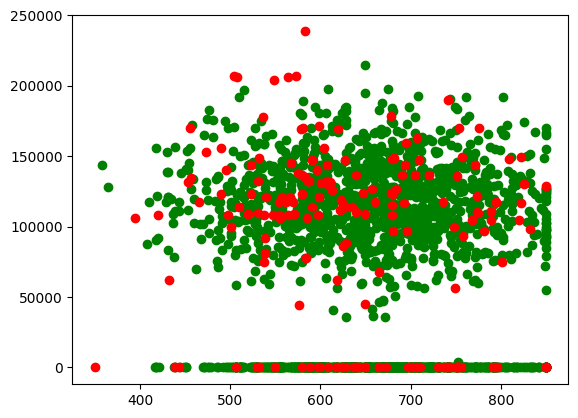

In [35]:
model_visualiztion(models[0]['model'])

In [27]:
df.head(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,619,0,0,42,2,0.0,1,1,1,1
